# Exploratory Data Analysis for Pitcher Injury Survival Analysis

This notebook provides comprehensive EDA for Bayesian survival analysis of pitcher injuries.

## Key Focus Areas:
- Survival data structure and quality
- Time-to-event distributions
- Censoring patterns
- Covariate distributions and relationships
- Risk factors identification

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## 1. Data Loading and Initial Overview

In [8]:
# Load the survival dataset
df = pd.read_csv('../data/processed/survival_dataset_lagged_enhanced.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (1284, 50)

First few rows:


,player_name,season,time_to_event,event,injury_type,injury_category,age,w,l,era,g,gs,ip,h,r,er,hr,bb,so,whip,k_per_9,bb_per_9,hr_per_9,fip,war,high_workload,veteran,high_era,age_prev,w_prev,l_prev,era_prev,g_prev,gs_prev,ip_prev,h_prev,r_prev,er_prev,hr_prev,bb_prev,so_prev,whip_prev,k_per_9_prev,bb_per_9_prev,hr_per_9_prev,fip_prev,war_prev,high_workload_prev,veteran_prev,high_era_prev
0,A.J. Minter,2021,180,0,NaN,NaN,27,3,6,3.780,61,0,52.100,44,27,22,2,20,57,1.220,9.800,3.440,0.340,2.690,1.300,0,0,0,24,4,3,3.230,65,0,61.100,57,23,22,3,22,69,1.290,10.130,3.230,0.440,2.720,1.400,0,0,0
1,A.J. Minter,2022,180,0,NaN,NaN,28,5,4,2.060,75,0,70.000,49,21,16,5,15,94,0.910,12.090,1.930,0.640,2.130,2.000,0,0,0,27,3,6,3.780,61,0,52.100,44,27,22,2,20,57,1.220,9.800,3.440,0.340,2.690,1.300,0,0,0
2,A.J. Minter,2023,105,1,shoulder,shoulder,29,3,6,3.760,70,0,64.200,56,28,27,6,21,82,1.190,11.410,2.920,0.840,2.900,1.400,0,0,0,28,5,4,2.060,75,0,70.000,49,21,16,5,15,94,0.910,12.090,1.930,0.640,2.130,2.000,0,0,0
3,A.J. Puk,2023,42,1,elbow,elbow,28,7,5,3.970,58,0,56.200,54,29,25,10,13,78,1.180,12.390,2.060,1.590,3.590,0.900,0,0,0,27,4,3,3.120,62,0,66.100,53,27,23,7,23,76,1.150,10.310,3.120,0.950,3.690,0.300,0,0,0
4,A.J. Puk,2024,19,1,shoulder,shoulder,29,4,9,3.150,62,4,71.100,51,31,25,5,28,88,1.110,11.100,3.530,0.630,2.870,1.700,0,0,0,28,7,5,3.970,58,0,56.200,54,29,25,10,13,78,1.180,12.390,2.060,1.590,3.590,0.900,0,0,0


In [9]:
# Basic information about the dataset
print("Dataset Info:")
print("="*50)
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   player_name         1284 non-null   object 
 1   season              1284 non-null   int64  
 2   time_to_event       1284 non-null   int64  
 3   event               1284 non-null   int64  
 4   injury_type         523 non-null    object 
 5   injury_category     523 non-null    object 
 6   age                 1284 non-null   int64  
 7   w                   1284 non-null   int64  
 8   l                   1284 non-null   int64  
 9   era                 1284 non-null   float64
 10  g                   1284 non-null   int64  
 11  gs                  1284 non-null   int64  
 12  ip                  1284 non-null   float64
 13  h                   1284 non-null   int64  
 14  r                   1284 non-null   int64  
 15  er                  1284 non-null   int64

In [10]:
# Statistical summary
print("\nStatistical Summary:")
print("="*50)
df.describe()


Statistical Summary:


,season,time_to_event,event,age,w,l,era,g,gs,ip,h,r,er,hr,bb,so,whip,k_per_9,bb_per_9,hr_per_9,fip,war,high_workload,veteran,high_era,age_prev,w_prev,l_prev,era_prev,g_prev,gs_prev,ip_prev,h_prev,r_prev,er_prev,hr_prev,bb_prev,so_prev,whip_prev,k_per_9_prev,bb_per_9_prev,hr_per_9_prev,fip_prev,war_prev,high_workload_prev,veteran_prev,high_era_prev
count,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000,1284.000
mean,2021.819,139.633,0.407,29.649,6.287,5.907,3.974,38.917,14.100,103.064,94.806,49.402,45.421,13.466,33.523,101.632,1.253,8.983,3.065,1.162,4.020,1.417,0.090,0.375,0.454,28.347,6.354,5.817,3.884,37.726,14.530,104.133,94.985,48.797,45.030,13.404,34.110,104.160,1.245,9.126,3.078,1.143,3.961,1.513,0.182,0.262,0.265
std,1.717,59.079,0.492,3.534,3.983,3.328,1.169,19.239,12.439,48.143,47.349,24.626,23.429,7.934,15.665,50.632,0.202,1.994,1.019,0.454,0.914,1.433,0.287,0.484,0.498,3.520,4.049,3.275,1.143,19.208,12.192,47.884,46.949,24.483,23.274,7.906,15.888,50.647,0.198,1.990,1.018,0.460,0.918,1.431,0.386,0.440,0.441
min,2019.000,1.000,0.000,22.000,0.000,0.000,0.610,8.000,0.000,50.000,23.000,6.000,5.000,0.000,5.000,25.000,0.550,4.160,0.770,0.000,0.900,-1.200,0.000,0.000,0.000,21.000,0.000,0.000,0.780,8.000,0.000,50.000,24.000,8.000,6.000,1.000,5.000,22.000,0.550,3.620,0.800,0.140,0.900,-1.400,0.000,0.000,0.000
25%,2021.000,95.750,0.000,27.000,3.000,3.000,3.180,25.000,0.000,62.100,54.000,29.000,25.750,7.000,21.000,63.000,1.120,7.578,2.350,0.860,3.400,0.400,0.000,0.000,0.000,26.000,3.000,3.000,3.110,24.000,0.000,63.200,54.750,28.000,25.000,7.000,22.000,66.000,1.110,7.770,2.380,0.830,3.320,0.500,0.000,0.000,0.000
50%,2022.000,180.000,0.000,29.000,5.000,5.000,3.860,32.000,12.000,80.100,77.500,43.000,40.000,12.000,30.000,85.000,1.250,8.810,2.940,1.130,3.965,1.100,0.000,0.000,0.000,28.000,5.000,5.000,3.810,32.000,13.000,83.200,81.000,43.000,40.000,12.000,31.000,89.000,1.240,8.955,2.965,1.110,3.930,1.200,0.000,0.000,0.000
75%,2023.000,180.000,1.000,32.000,9.000,8.000,4.670,59.000,27.000,145.400,137.000,69.000,64.000,19.000,44.000,132.000,1.380,10.145,3.672,1.420,4.610,2.100,0.000,1.000,1.000,31.000,9.000,8.000,4.560,58.000,26.000,144.400,134.000,68.000,63.000,19.000,44.000,134.000,1.370,10.320,3.650,1.430,4.540,2.200,0.000,1.000,1.000
max,2024.000,190.000,1.000,43.000,21.000,19.000,9.580,83.000,35.000,228.200,227.000,130.000,124.000,44.000,99.000,326.000,2.060,17.130,7.840,3.150,7.650,7.500,1.000,1.000,1.000,42.000,21.000,19.000,8.070,81.000,35.000,228.200,226.000,127.000,118.000,44.000,99.000,326.000,1.900,17.130,8.250,3.200,7.160,9.000,1.000,1.000,1.000


## 2. Survival Data Structure Analysis

In [11]:
# Key survival analysis variables
print("SURVIVAL ANALYSIS KEY VARIABLES")
print("="*50)
print(f"Time Variable: time_to_event")
print(f"Event Variable: event (1=injury occurred, 0=censored)")
print(f"\nTime Range: {df['time_to_event'].min()} - {df['time_to_event'].max()} days")
print(f"Mean Time: {df['time_to_event'].mean():.2f} days")
print(f"Median Time: {df['time_to_event'].median():.2f} days")

SURVIVAL ANALYSIS KEY VARIABLES
Time Variable: time_to_event
Event Variable: event (1=injury occurred, 0=censored)

Time Range: 1 - 190 days
Mean Time: 139.63 days
Median Time: 180.00 days


In [12]:
# Event rates and censoring
event_counts = df['event'].value_counts()
event_pct = df['event'].value_counts(normalize=True) * 100

print("\nEVENT RATES AND CENSORING")
print("="*50)
print(f"Total Observations: {len(df)}")
print(f"Injury Events: {event_counts.get(1, 0)} ({event_pct.get(1, 0):.1f}%)")
print(f"Censored: {event_counts.get(0, 0)} ({event_pct.get(0, 0):.1f}%)")
print(f"\nCensoring Rate: {(df['event']==0).mean():.1%}")
print(f"Event Rate: {(df['event']==1).mean():.1%}")


EVENT RATES AND CENSORING
Total Observations: 1284
Injury Events: 523 (40.7%)
Censored: 761 (59.3%)

Censoring Rate: 59.3%
Event Rate: 40.7%


In [13]:
# Injury types distribution
injury_df = df[df['event'] == 1].copy()

print("\nINJURY TYPES DISTRIBUTION")
print("="*50)
if 'injury_type' in df.columns:
    injury_types = injury_df['injury_type'].value_counts()
    print(injury_types)
    print(f"\nTotal unique injury types: {injury_df['injury_type'].nunique()}")

if 'injury_category' in df.columns:
    print("\nINJURY CATEGORIES:")
    injury_cats = injury_df['injury_category'].value_counts()
    print(injury_cats)


INJURY TYPES DISTRIBUTION
injury_type
other       232
shoulder     80
back         54
elbow        51
leg          43
arm          35
hand         25
head          3
Name: count, dtype: int64

Total unique injury types: 8

INJURY CATEGORIES:
injury_category
other       392
shoulder     80
elbow        51
Name: count, dtype: int64


## 3. Time-to-Event Distribution Analysis

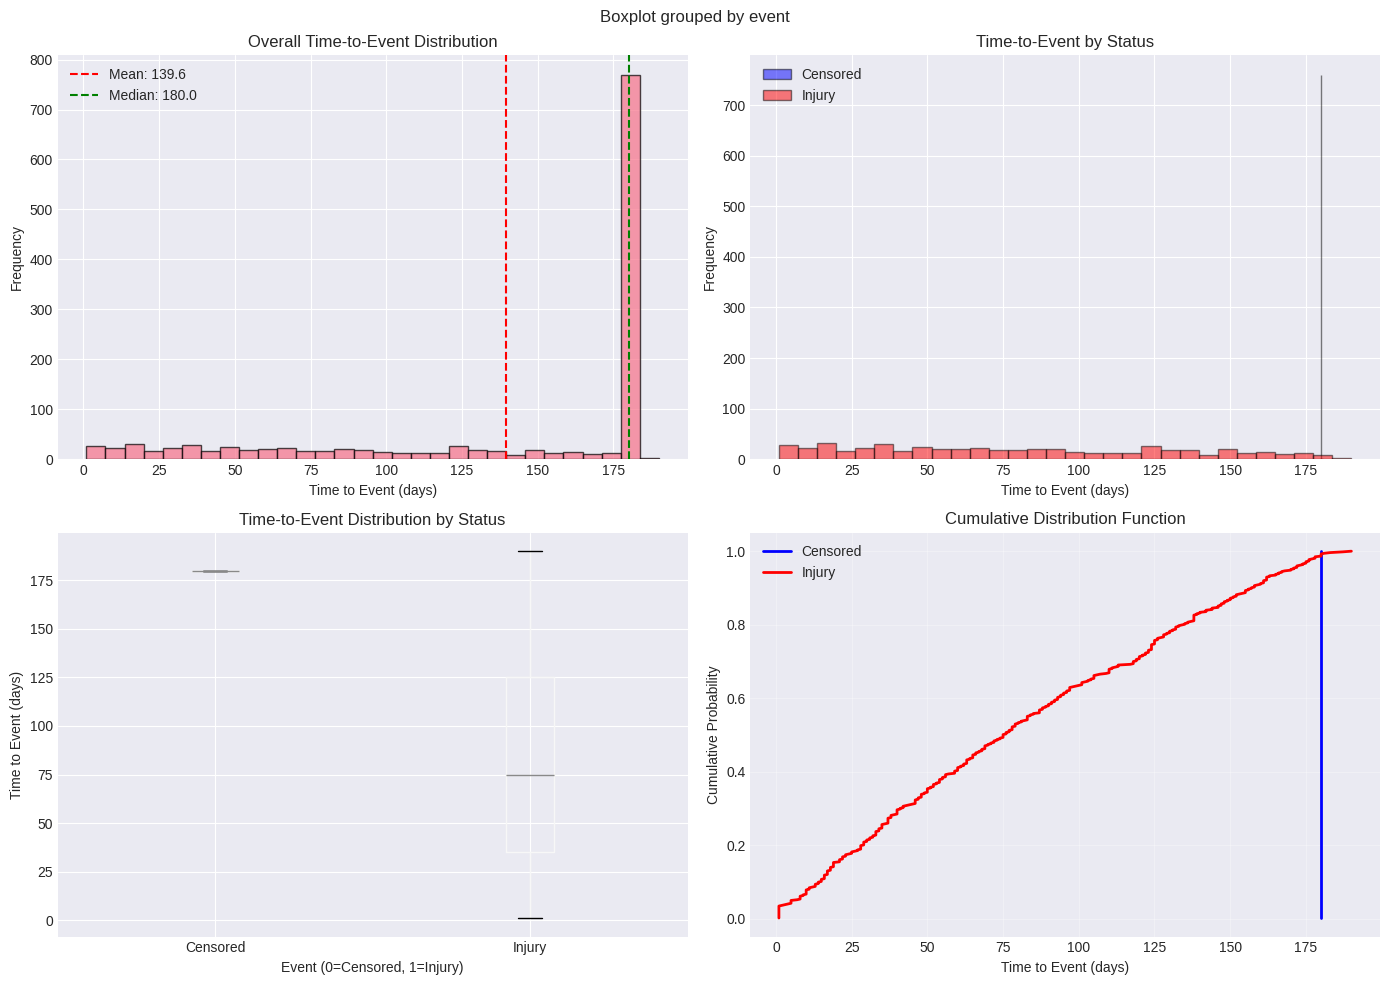

In [14]:
# Time-to-event distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Overall distribution
axes[0,0].hist(df['time_to_event'], bins=30, edgecolor='black', alpha=0.7)
axes[0,0].axvline(df['time_to_event'].mean(), color='red', linestyle='--', label=f'Mean: {df["time_to_event"].mean():.1f}')
axes[0,0].axvline(df['time_to_event'].median(), color='green', linestyle='--', label=f'Median: {df["time_to_event"].median():.1f}')
axes[0,0].set_xlabel('Time to Event (days)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Overall Time-to-Event Distribution')
axes[0,0].legend()

# By event status
for event_val, label, color in [(0, 'Censored', 'blue'), (1, 'Injury', 'red')]:
    subset = df[df['event'] == event_val]['time_to_event']
    axes[0,1].hist(subset, bins=30, alpha=0.5, label=label, color=color, edgecolor='black')
axes[0,1].set_xlabel('Time to Event (days)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Time-to-Event by Status')
axes[0,1].legend()

# Box plot comparison
df.boxplot(column='time_to_event', by='event', ax=axes[1,0])
axes[1,0].set_xlabel('Event (0=Censored, 1=Injury)')
axes[1,0].set_ylabel('Time to Event (days)')
axes[1,0].set_title('Time-to-Event Distribution by Status')
plt.sca(axes[1,0])
plt.xticks([1, 2], ['Censored', 'Injury'])

# Cumulative distribution
for event_val, label, color in [(0, 'Censored', 'blue'), (1, 'Injury', 'red')]:
    subset = df[df['event'] == event_val]['time_to_event'].sort_values()
    axes[1,1].plot(subset, np.arange(1, len(subset)+1)/len(subset), label=label, color=color, linewidth=2)
axes[1,1].set_xlabel('Time to Event (days)')
axes[1,1].set_ylabel('Cumulative Probability')
axes[1,1].set_title('Cumulative Distribution Function')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [15]:
# Early vs Late injuries analysis
if df[df['event'] == 1].shape[0] > 0:
    injury_times = df[df['event'] == 1]['time_to_event']
    
    print("\nINJURY TIMING ANALYSIS")
    print("="*50)
    print(f"Earliest injury: Day {injury_times.min()}")
    print(f"Latest injury: Day {injury_times.max()}")
    print(f"Mean injury time: Day {injury_times.mean():.1f}")
    print(f"Median injury time: Day {injury_times.median():.1f}")
    
    # Quartile analysis
    print("\nInjury Time Quartiles:")
    print(f"25th percentile: Day {injury_times.quantile(0.25):.1f}")
    print(f"50th percentile: Day {injury_times.quantile(0.50):.1f}")
    print(f"75th percentile: Day {injury_times.quantile(0.75):.1f}")
    
    # Early vs late injuries (split at median)
    median_time = injury_times.median()
    early_injuries = injury_times[injury_times <= median_time].shape[0]
    late_injuries = injury_times[injury_times > median_time].shape[0]
    
    print(f"\nEarly injuries (≤ Day {median_time:.0f}): {early_injuries}")
    print(f"Late injuries (> Day {median_time:.0f}): {late_injuries}")


INJURY TIMING ANALYSIS
Earliest injury: Day 1
Latest injury: Day 190
Mean injury time: Day 80.9
Median injury time: Day 75.0

Injury Time Quartiles:
25th percentile: Day 35.0
50th percentile: Day 75.0
75th percentile: Day 125.0

Early injuries (≤ Day 75): 262
Late injuries (> Day 75): 261


## 4. Covariate Analysis for Survival Modeling

In [16]:
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ['time_to_event', 'event']]

categorical_cols = ['high_workload', 'veteran', 'high_era']
performance_cols = ['era', 'whip', 'k_per_9', 'bb_per_9', 'hr_per_9', 'fip', 'war']
workload_cols = ['g', 'gs', 'ip', 'w', 'l']

print("COVARIATE CATEGORIES")
print("="*50)
print(f"Performance metrics: {performance_cols}")
print(f"Workload metrics: {workload_cols}")
print(f"Binary indicators: {categorical_cols}")
print(f"\nTotal covariates: {len(numeric_cols)}")

COVARIATE CATEGORIES
Performance metrics: ['era', 'whip', 'k_per_9', 'bb_per_9', 'hr_per_9', 'fip', 'war']
Workload metrics: ['g', 'gs', 'ip', 'w', 'l']
Binary indicators: ['high_workload', 'veteran', 'high_era']

Total covariates: 45


In [17]:
# Missing data analysis
missing_data = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_pct
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nMISSING DATA ANALYSIS")
    print("="*50)
    print(missing_df)
else:
    print("\nNo missing data detected - dataset is complete!")


MISSING DATA ANALYSIS
                 Missing_Count  Missing_Percentage
injury_type                761              59.268
injury_category            761              59.268


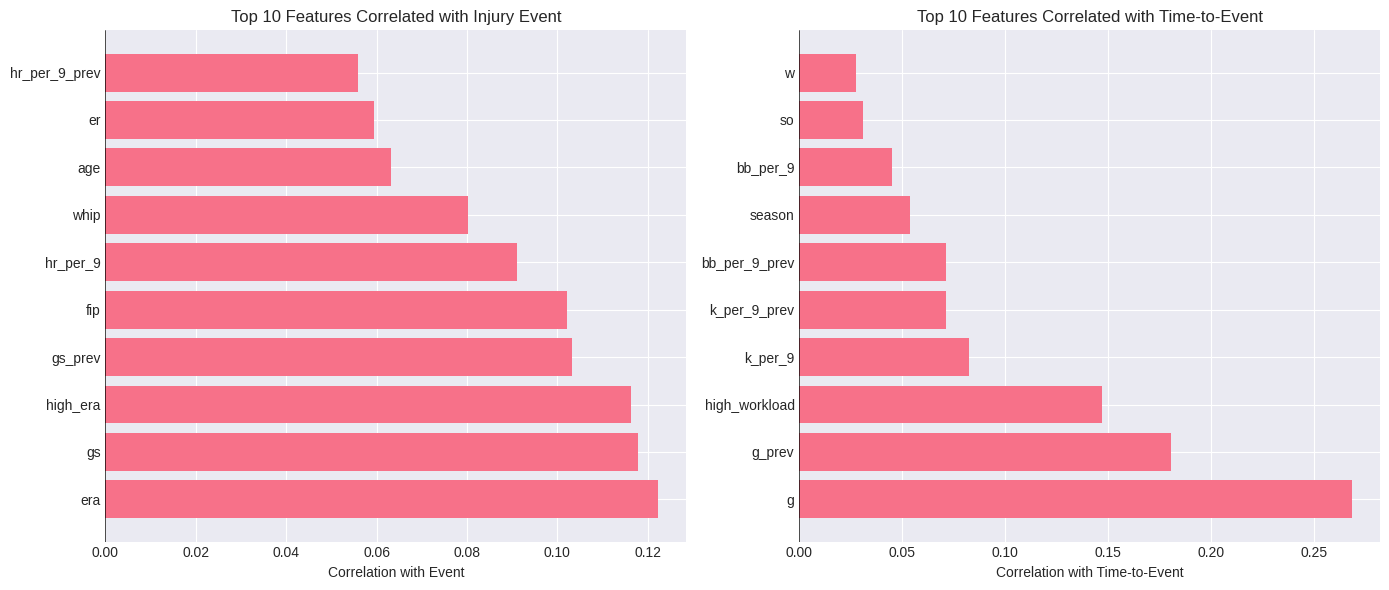

In [18]:
# Correlation analysis with survival outcomes
correlations_with_event = df[numeric_cols + ['event']].corr()['event'].sort_values(ascending=False)
correlations_with_time = df[numeric_cols + ['time_to_event']].corr()['time_to_event'].sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Correlation with event
top_corr_event = correlations_with_event[1:11]  # Exclude self-correlation
axes[0].barh(range(len(top_corr_event)), top_corr_event.values)
axes[0].set_yticks(range(len(top_corr_event)))
axes[0].set_yticklabels(top_corr_event.index)
axes[0].set_xlabel('Correlation with Event')
axes[0].set_title('Top 10 Features Correlated with Injury Event')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

# Correlation with time
top_corr_time = correlations_with_time[1:11]  # Exclude self-correlation
axes[1].barh(range(len(top_corr_time)), top_corr_time.values)
axes[1].set_yticks(range(len(top_corr_time)))
axes[1].set_yticklabels(top_corr_time.index)
axes[1].set_xlabel('Correlation with Time-to-Event')
axes[1].set_title('Top 10 Features Correlated with Time-to-Event')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

## 5. Risk Factor Analysis

In [19]:
# Binary risk factors analysis
print("BINARY RISK FACTORS ANALYSIS")
print("="*50)

for col in categorical_cols:
    if col in df.columns:
        risk_table = pd.crosstab(df[col], df['event'], normalize='index') * 100
        print(f"\n{col.upper()}:")
        print(risk_table.round(1))
        print(f"Injury rate when {col}=1: {risk_table.loc[1, 1] if 1 in risk_table.index else 0:.1f}%")
        print(f"Injury rate when {col}=0: {risk_table.loc[0, 1] if 0 in risk_table.index else 0:.1f}%")

BINARY RISK FACTORS ANALYSIS

HIGH_WORKLOAD:
event              0      1
high_workload              
0             56.600 43.400
1             86.200 13.800
Injury rate when high_workload=1: 13.8%
Injury rate when high_workload=0: 43.4%

VETERAN:
event        0      1
veteran              
0       60.700 39.300
1       56.800 43.200
Injury rate when veteran=1: 43.2%
Injury rate when veteran=0: 39.3%

HIGH_ERA:
event         0      1
high_era              
0        64.500 35.500
1        53.000 47.000
Injury rate when high_era=1: 47.0%
Injury rate when high_era=0: 35.5%


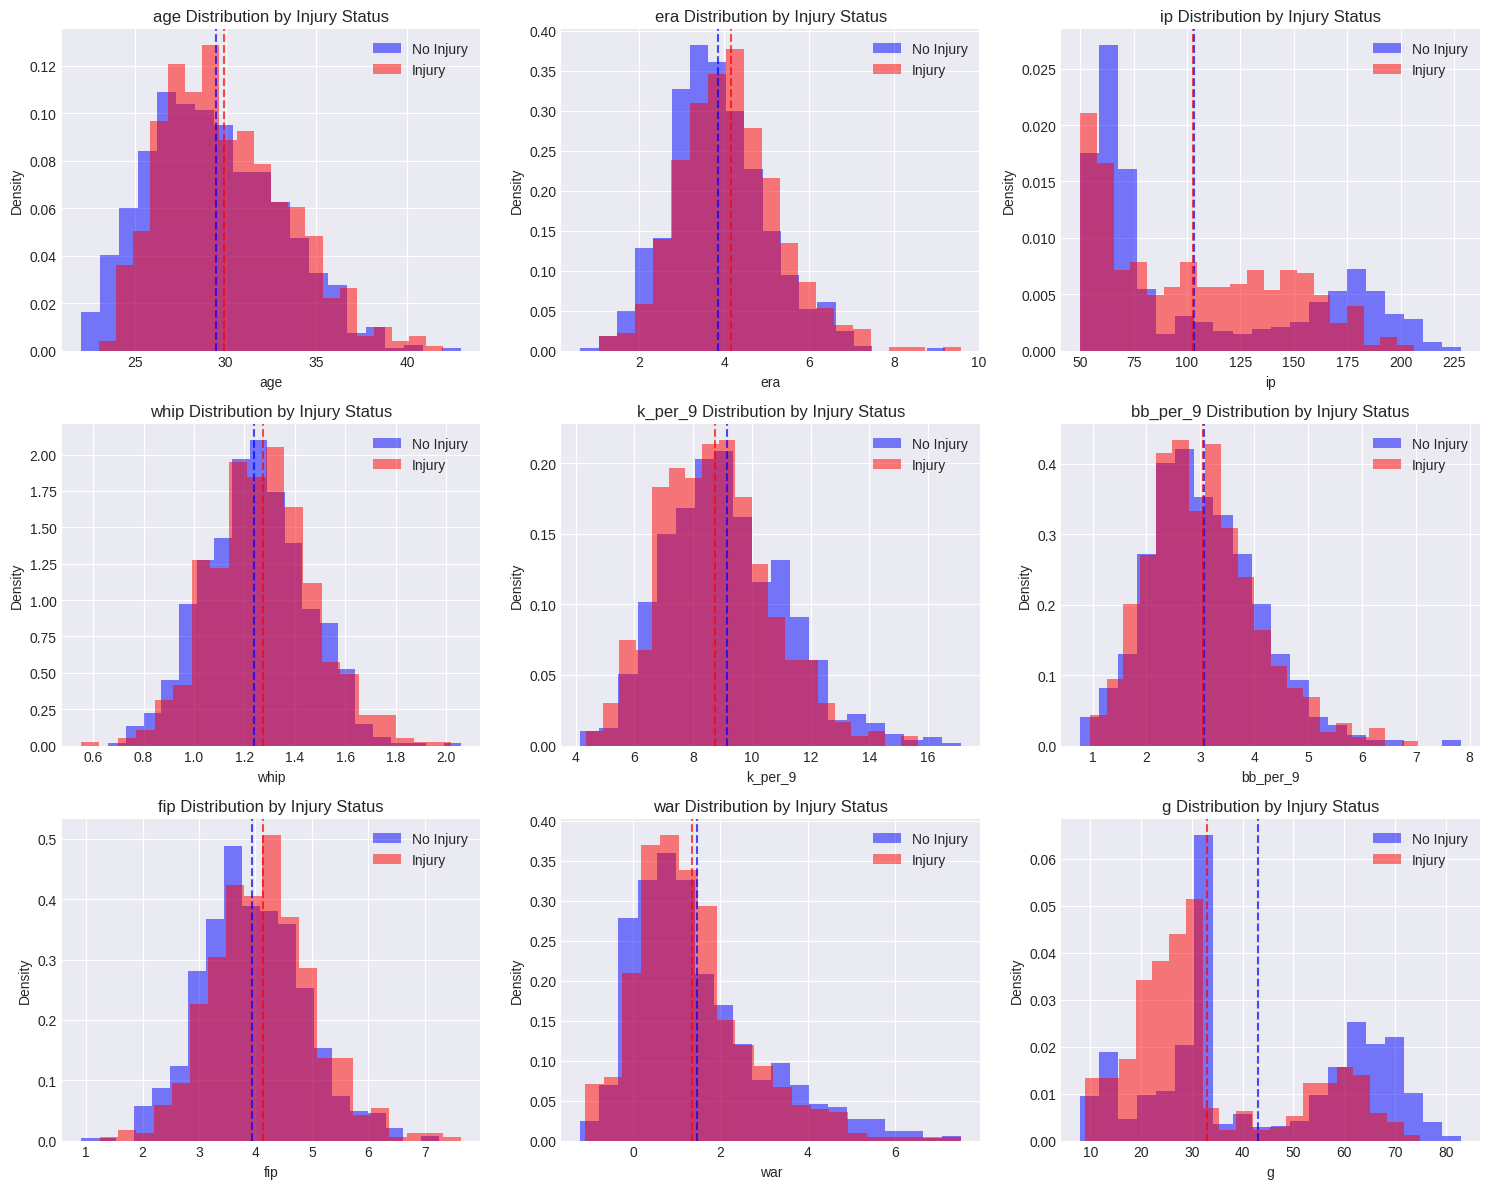

In [20]:
# Continuous risk factors - comparison between injured and non-injured
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

key_metrics = ['age', 'era', 'ip', 'whip', 'k_per_9', 'bb_per_9', 'fip', 'war', 'g']

for idx, col in enumerate(key_metrics):
    if col in df.columns:
        injured = df[df['event'] == 1][col].dropna()
        not_injured = df[df['event'] == 0][col].dropna()
        
        axes[idx].hist(not_injured, bins=20, alpha=0.5, label='No Injury', color='blue', density=True)
        axes[idx].hist(injured, bins=20, alpha=0.5, label='Injury', color='red', density=True)
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Density')
        axes[idx].set_title(f'{col} Distribution by Injury Status')
        axes[idx].legend()
        
        # Add mean lines
        axes[idx].axvline(not_injured.mean(), color='blue', linestyle='--', alpha=0.7)
        axes[idx].axvline(injured.mean(), color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [21]:
# Statistical tests for risk factors
print("\nSTATISTICAL SIGNIFICANCE OF RISK FACTORS")
print("="*50)
print("T-tests comparing injured vs non-injured groups:\n")

results = []
for col in key_metrics:
    if col in df.columns:
        injured = df[df['event'] == 1][col].dropna()
        not_injured = df[df['event'] == 0][col].dropna()
        
        if len(injured) > 0 and len(not_injured) > 0:
            t_stat, p_value = stats.ttest_ind(injured, not_injured)
            mean_diff = injured.mean() - not_injured.mean()
            
            results.append({
                'Variable': col,
                'Mean_Injured': injured.mean(),
                'Mean_NotInjured': not_injured.mean(),
                'Mean_Difference': mean_diff,
                'T_Statistic': t_stat,
                'P_Value': p_value,
                'Significant': 'Yes' if p_value < 0.05 else 'No'
            })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values('P_Value')
print(results_df.to_string(index=False))


STATISTICAL SIGNIFICANCE OF RISK FACTORS
T-tests comparing injured vs non-injured groups:

Variable  Mean_Injured  Mean_NotInjured  Mean_Difference  T_Statistic  P_Value Significant
       g        32.992           42.988           -9.996       -9.457    0.000         Yes
     era         4.147            3.856            0.291        4.415    0.000         Yes
     fip         4.132            3.942            0.190        3.678    0.000         Yes
 k_per_9         8.760            9.137           -0.378       -3.347    0.001         Yes
    whip         1.272            1.239            0.033        2.880    0.004         Yes
     age        29.918           29.464            0.454        2.265    0.024         Yes
     war         1.345            1.466           -0.121       -1.490    0.137          No
bb_per_9         3.052            3.074           -0.022       -0.372    0.710          No
      ip       102.560          103.411           -0.850       -0.311    0.756          N

## 6. Temporal Patterns and Season Effects


SEASON-BY-SEASON ANALYSIS
        Total_Players  Injuries  Injury_Rate  Mean_Time  Median_Time
season                                                              
2019              223        93        0.420    132.580      180.000
2020               71         7        0.100    176.590      180.000
2021              213       115        0.540    122.710      155.000
2022              250       108        0.430    138.500      180.000
2023              262       103        0.390    146.420      180.000
2024              265        97        0.370    143.630      180.000


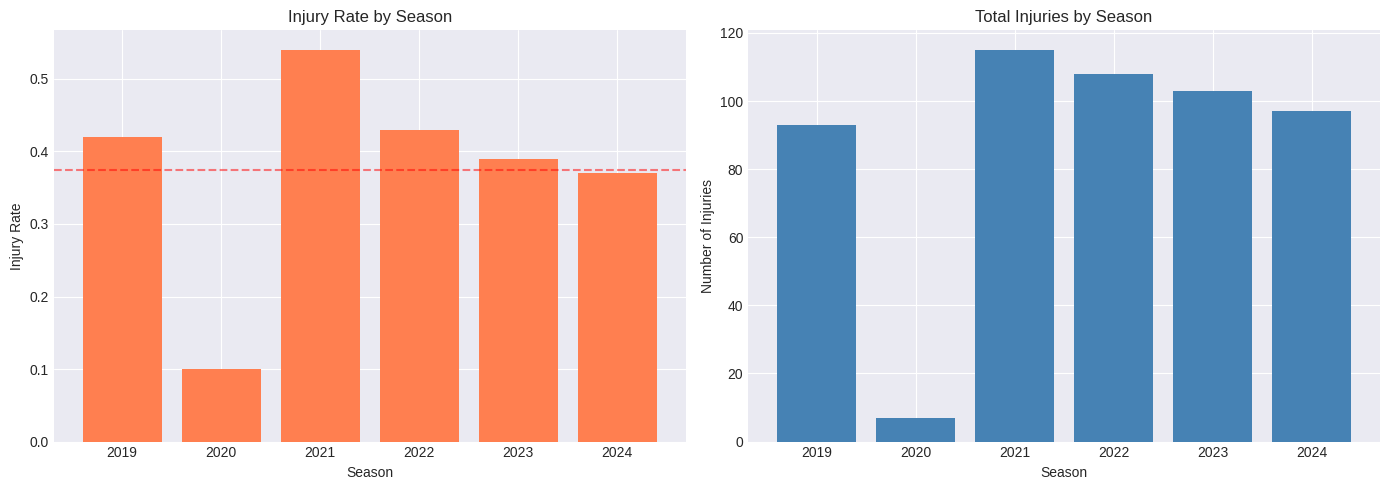

In [22]:
# Season analysis
if 'season' in df.columns:
    season_summary = df.groupby('season').agg({
        'event': ['count', 'sum', 'mean'],
        'time_to_event': ['mean', 'median']
    }).round(2)
    
    season_summary.columns = ['Total_Players', 'Injuries', 'Injury_Rate', 'Mean_Time', 'Median_Time']
    
    print("\nSEASON-BY-SEASON ANALYSIS")
    print("="*50)
    print(season_summary)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Injury rate by season
    axes[0].bar(season_summary.index, season_summary['Injury_Rate'], color='coral')
    axes[0].set_xlabel('Season')
    axes[0].set_ylabel('Injury Rate')
    axes[0].set_title('Injury Rate by Season')
    axes[0].axhline(y=season_summary['Injury_Rate'].mean(), color='red', linestyle='--', alpha=0.5)
    
    # Total injuries by season
    axes[1].bar(season_summary.index, season_summary['Injuries'], color='steelblue')
    axes[1].set_xlabel('Season')
    axes[1].set_ylabel('Number of Injuries')
    axes[1].set_title('Total Injuries by Season')
    
    plt.tight_layout()
    plt.show()

## 7. Workload Analysis


WORKLOAD ANALYSIS (Innings Pitched)
                   Count  Injuries  Injury_Rate  Avg_Time_to_Event
workload_category                                                 
Very Low (<50)        11         4        0.364            133.727
Low (50-100)         728       264        0.363            144.433
Medium (100-150)     248       166        0.669            112.101
High (150-200)       264        87        0.330            148.644
Very High (>200)      33         2        0.061            170.545


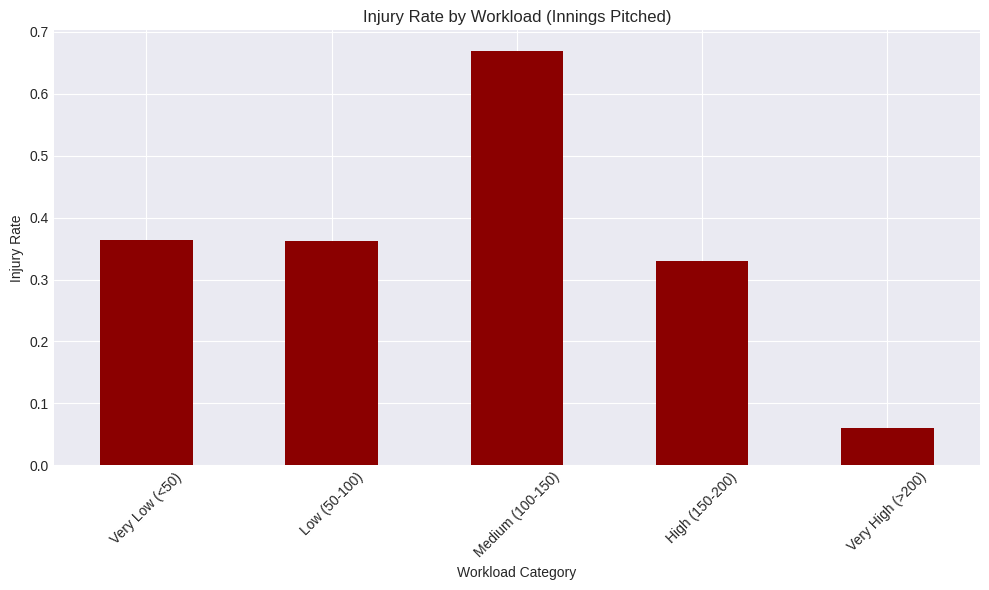

In [23]:
# Innings pitched analysis
if 'ip' in df.columns:
    # Create workload categories
    df['workload_category'] = pd.cut(df['ip'], 
                                     bins=[0, 50, 100, 150, 200, 300],
                                     labels=['Very Low (<50)', 'Low (50-100)', 
                                            'Medium (100-150)', 'High (150-200)', 
                                            'Very High (>200)'])
    
    workload_analysis = df.groupby('workload_category').agg({
        'event': ['count', 'sum', 'mean'],
        'time_to_event': 'mean'
    }).round(3)
    
    workload_analysis.columns = ['Count', 'Injuries', 'Injury_Rate', 'Avg_Time_to_Event']
    
    print("\nWORKLOAD ANALYSIS (Innings Pitched)")
    print("="*50)
    print(workload_analysis)
    
    # Visualization
    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    workload_analysis['Injury_Rate'].plot(kind='bar', ax=ax, color='darkred')
    ax.set_xlabel('Workload Category')
    ax.set_ylabel('Injury Rate')
    ax.set_title('Injury Rate by Workload (Innings Pitched)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

## 8. Age Effects Analysis


AGE GROUP ANALYSIS
                 Count  Injuries  Injury_Rate  Avg_Time_to_Event
age_group                                                       
Young (<25)        138        45        0.326            147.899
Prime (25-30)      664       270        0.407            141.253
Veteran (30-35)    404       170        0.421            136.488
Old (>35)           78        38        0.487            127.513


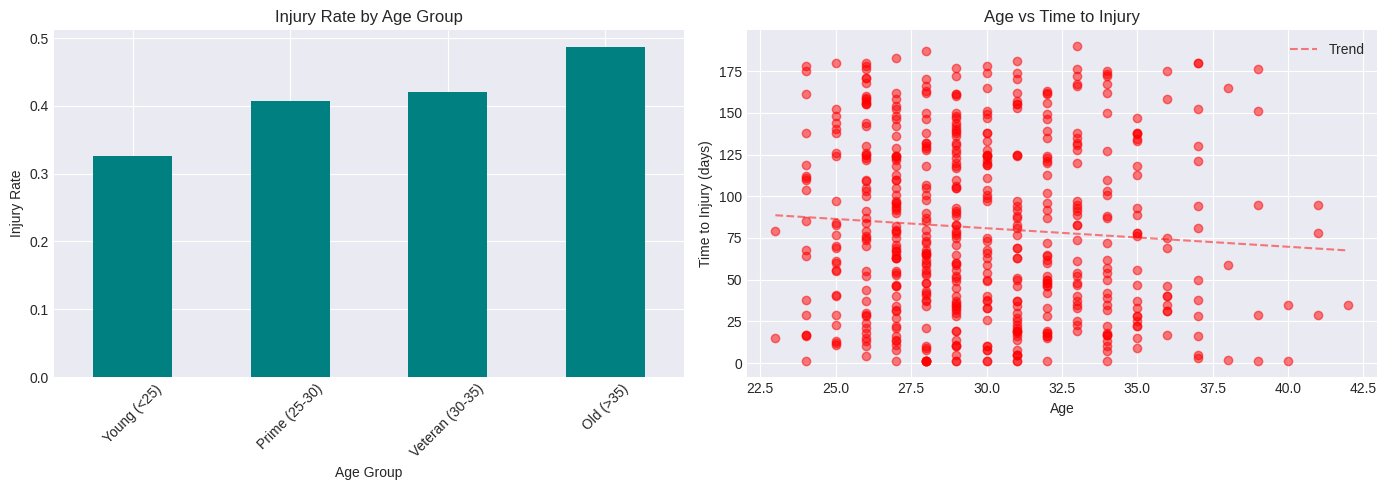

In [24]:
# Age analysis
if 'age' in df.columns:
    # Create age groups
    df['age_group'] = pd.cut(df['age'], 
                             bins=[0, 25, 30, 35, 50],
                             labels=['Young (<25)', 'Prime (25-30)', 
                                    'Veteran (30-35)', 'Old (>35)'])
    
    age_analysis = df.groupby('age_group').agg({
        'event': ['count', 'sum', 'mean'],
        'time_to_event': 'mean'
    }).round(3)
    
    age_analysis.columns = ['Count', 'Injuries', 'Injury_Rate', 'Avg_Time_to_Event']
    
    print("\nAGE GROUP ANALYSIS")
    print("="*50)
    print(age_analysis)
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Injury rate by age group
    age_analysis['Injury_Rate'].plot(kind='bar', ax=axes[0], color='teal')
    axes[0].set_xlabel('Age Group')
    axes[0].set_ylabel('Injury Rate')
    axes[0].set_title('Injury Rate by Age Group')
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
    
    # Scatter plot of age vs time to event
    injured_df = df[df['event'] == 1]
    axes[1].scatter(injured_df['age'], injured_df['time_to_event'], alpha=0.5, color='red')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Time to Injury (days)')
    axes[1].set_title('Age vs Time to Injury')
    
    # Add trend line
    z = np.polyfit(injured_df['age'].dropna(), injured_df['time_to_event'].dropna(), 1)
    p = np.poly1d(z)
    axes[1].plot(injured_df['age'].sort_values(), p(injured_df['age'].sort_values()), 
                "r--", alpha=0.5, label='Trend')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()

## 9. Performance Metrics and Injury Risk

In [25]:
# Performance quartile analysis
performance_metrics = ['era', 'whip', 'fip']

for metric in performance_metrics:
    if metric in df.columns:
        # Create quartiles
        df[f'{metric}_quartile'] = pd.qcut(df[metric], q=4, 
                                           labels=['Q1 (Best)', 'Q2', 'Q3', 'Q4 (Worst)'])
        
        quartile_analysis = df.groupby(f'{metric}_quartile')['event'].agg(['count', 'sum', 'mean'])
        quartile_analysis.columns = ['Total', 'Injuries', 'Injury_Rate']
        
        print(f"\n{metric.upper()} QUARTILE ANALYSIS")
        print("="*50)
        print(quartile_analysis.round(3))
        print(f"\nChi-square test for {metric}:")
        contingency_table = pd.crosstab(df[f'{metric}_quartile'], df['event'])
        chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
        print(f"Chi-square statistic: {chi2:.3f}")
        print(f"P-value: {p_value:.4f}")
        print(f"Significant: {'Yes' if p_value < 0.05 else 'No'}")


ERA QUARTILE ANALYSIS
              Total  Injuries  Injury_Rate
era_quartile                              
Q1 (Best)       324       106        0.327
Q2              322       121        0.376
Q3              320       139        0.434
Q4 (Worst)      318       157        0.494

Chi-square test for era:
Chi-square statistic: 20.752
P-value: 0.0001
Significant: Yes

WHIP QUARTILE ANALYSIS
               Total  Injuries  Injury_Rate
whip_quartile                              
Q1 (Best)        335       120        0.358
Q2               334       125        0.374
Q3               295       136        0.461
Q4 (Worst)       320       142        0.444

Chi-square test for whip:
Chi-square statistic: 10.142
P-value: 0.0174
Significant: Yes

FIP QUARTILE ANALYSIS
              Total  Injuries  Injury_Rate
fip_quartile                              
Q1 (Best)       322       108        0.335
Q2              320       123        0.384
Q3              322       148        0.460
Q4 (Worst)      

## 10. Multivariate Patterns

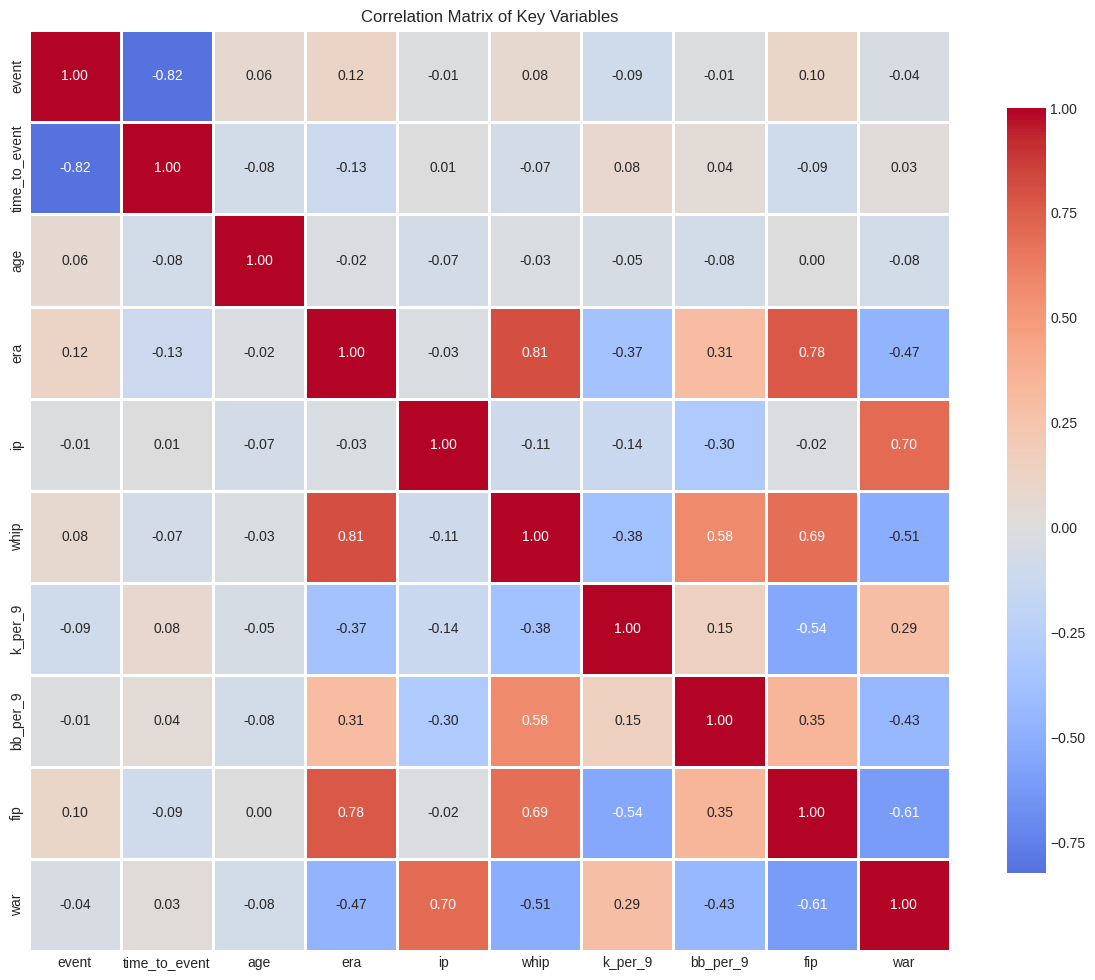

In [26]:
# Heatmap of correlations
fig, ax = plt.subplots(figsize=(12, 10))

# Select key variables for correlation
key_vars = ['event', 'time_to_event', 'age', 'era', 'ip', 'whip', 'k_per_9', 'bb_per_9', 'fip', 'war']
available_vars = [col for col in key_vars if col in df.columns]

corr_matrix = df[available_vars].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Key Variables')
plt.tight_layout()
plt.show()


AGE-WORKLOAD INTERACTION ANALYSIS
                     Count  Injuries  Injury_Rate
age_workload_group                               
Old_High_Workload      138        46        0.333
Old_Low_Workload       464       206        0.444
Young_High_Workload    161        44        0.273
Young_Low_Workload     521       227        0.436


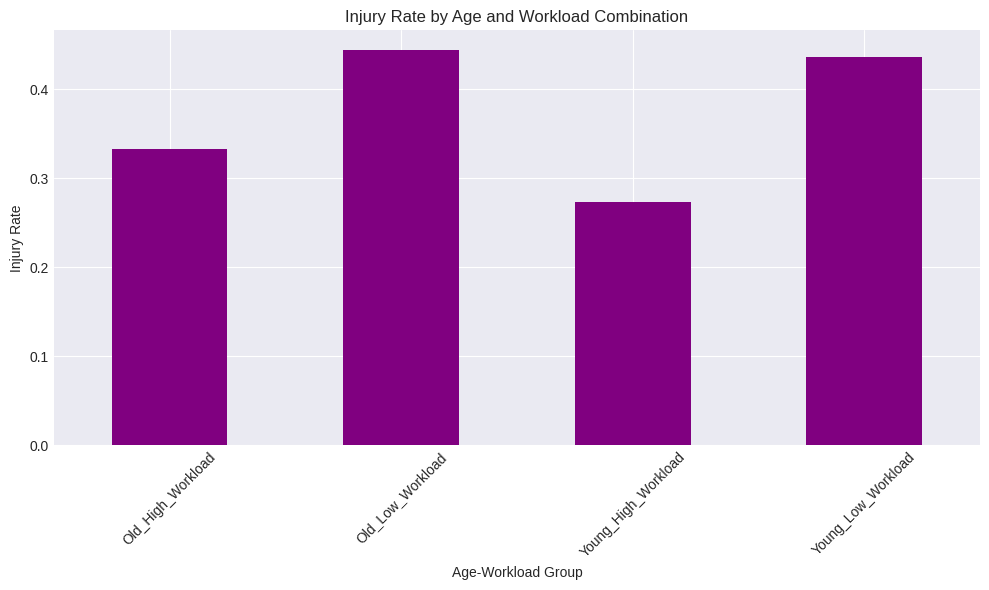

In [27]:
# Interaction effects: Age and Workload
if 'age' in df.columns and 'ip' in df.columns:
    # Create interaction groups
    df['age_workload_group'] = ''
    df.loc[(df['age'] < 30) & (df['ip'] < 150), 'age_workload_group'] = 'Young_Low_Workload'
    df.loc[(df['age'] < 30) & (df['ip'] >= 150), 'age_workload_group'] = 'Young_High_Workload'
    df.loc[(df['age'] >= 30) & (df['ip'] < 150), 'age_workload_group'] = 'Old_Low_Workload'
    df.loc[(df['age'] >= 30) & (df['ip'] >= 150), 'age_workload_group'] = 'Old_High_Workload'
    
    interaction_analysis = df[df['age_workload_group'] != ''].groupby('age_workload_group')['event'].agg(
        ['count', 'sum', 'mean']
    )
    interaction_analysis.columns = ['Count', 'Injuries', 'Injury_Rate']
    
    print("\nAGE-WORKLOAD INTERACTION ANALYSIS")
    print("="*50)
    print(interaction_analysis.round(3))
    
    # Visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    interaction_analysis['Injury_Rate'].plot(kind='bar', ax=ax, color='purple')
    ax.set_xlabel('Age-Workload Group')
    ax.set_ylabel('Injury Rate')
    ax.set_title('Injury Rate by Age and Workload Combination')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.tight_layout()
    plt.show()

## 11. Survival Curve Preparation

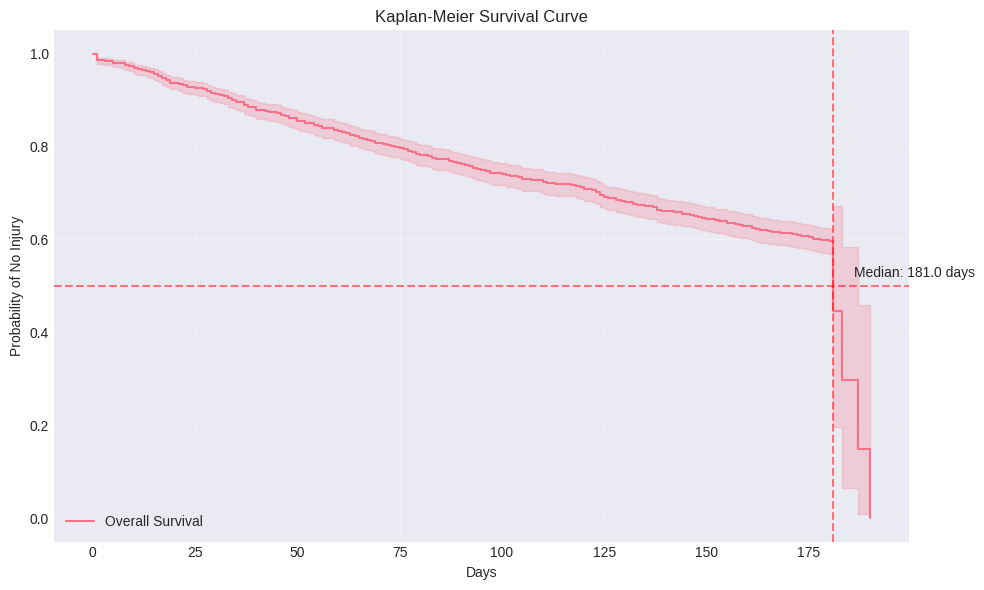


Median Survival Time: 181.0 days
Mean Survival Time: 181.0 days


In [28]:
# Kaplan-Meier survival function (non-parametric estimate)
from lifelines import KaplanMeierFitter

# Fit Kaplan-Meier
kmf = KaplanMeierFitter()
kmf.fit(df['time_to_event'], event_observed=df['event'])

# Plot survival curve
fig, ax = plt.subplots(figsize=(10, 6))
kmf.plot_survival_function(ax=ax, label='Overall Survival')
ax.set_xlabel('Days')
ax.set_ylabel('Probability of No Injury')
ax.set_title('Kaplan-Meier Survival Curve')
ax.grid(True, alpha=0.3)

# Add median survival time
median_survival = kmf.median_survival_time_
ax.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
ax.axvline(x=median_survival, color='red', linestyle='--', alpha=0.5)
ax.text(median_survival + 5, 0.52, f'Median: {median_survival:.1f} days', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nMedian Survival Time: {median_survival:.1f} days")
print(f"Mean Survival Time: {kmf.median_survival_time_:.1f} days")

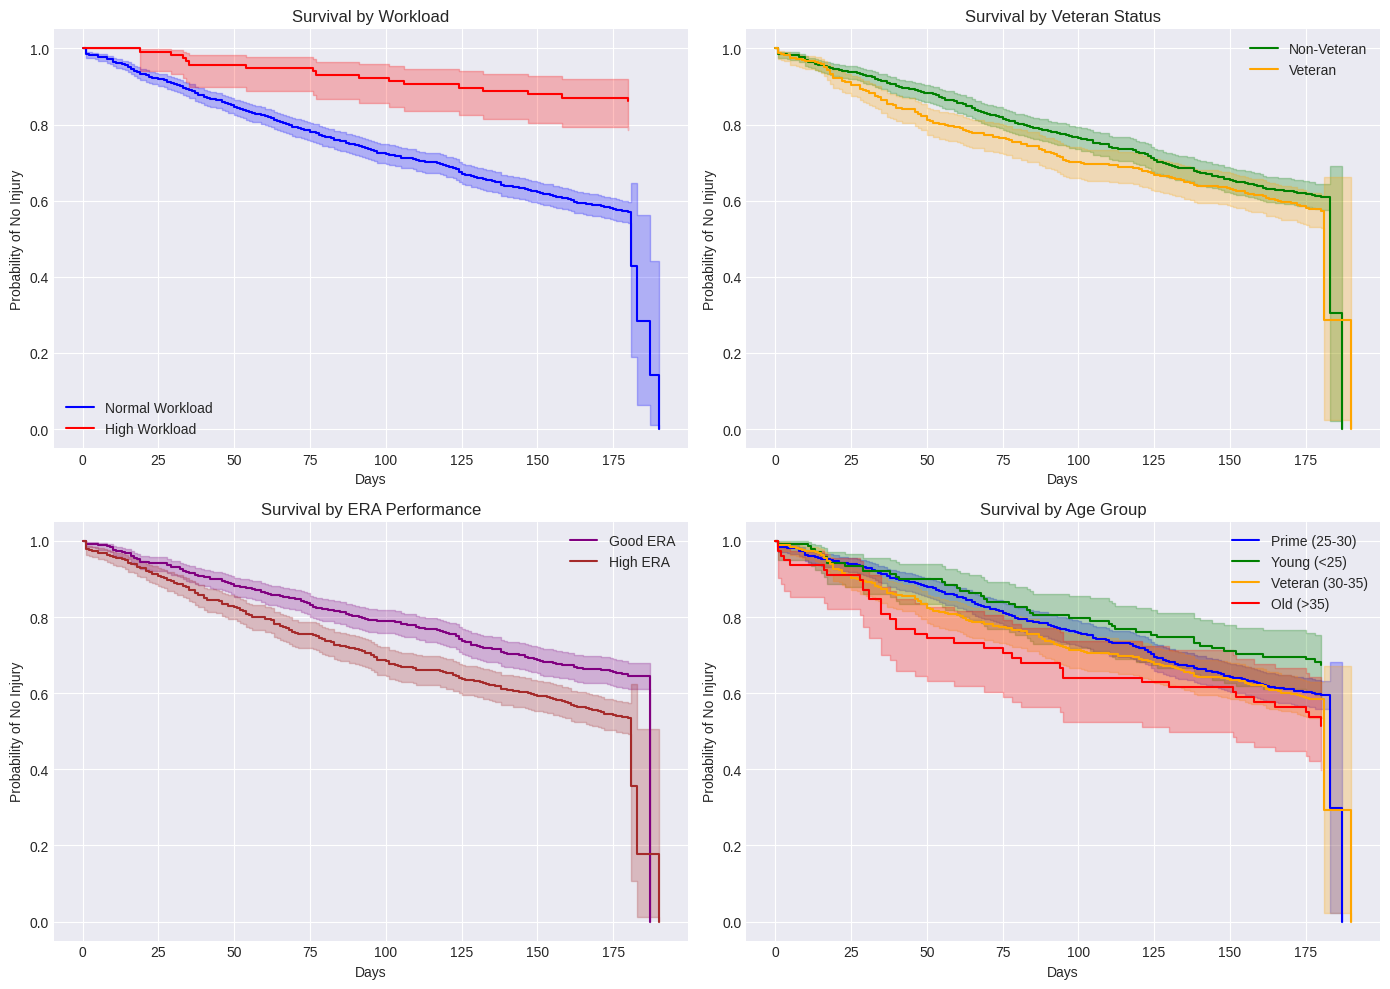

In [29]:
# Stratified survival curves
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# By high workload
for value, label, color in [(0, 'Normal Workload', 'blue'), (1, 'High Workload', 'red')]:
    if 'high_workload' in df.columns:
        mask = df['high_workload'] == value
        kmf.fit(df.loc[mask, 'time_to_event'], event_observed=df.loc[mask, 'event'], label=label)
        kmf.plot_survival_function(ax=axes[0,0], color=color)
axes[0,0].set_title('Survival by Workload')
axes[0,0].set_xlabel('Days')
axes[0,0].set_ylabel('Probability of No Injury')

# By veteran status
for value, label, color in [(0, 'Non-Veteran', 'green'), (1, 'Veteran', 'orange')]:
    if 'veteran' in df.columns:
        mask = df['veteran'] == value
        kmf.fit(df.loc[mask, 'time_to_event'], event_observed=df.loc[mask, 'event'], label=label)
        kmf.plot_survival_function(ax=axes[0,1], color=color)
axes[0,1].set_title('Survival by Veteran Status')
axes[0,1].set_xlabel('Days')
axes[0,1].set_ylabel('Probability of No Injury')

# By ERA performance
for value, label, color in [(0, 'Good ERA', 'purple'), (1, 'High ERA', 'brown')]:
    if 'high_era' in df.columns:
        mask = df['high_era'] == value
        kmf.fit(df.loc[mask, 'time_to_event'], event_observed=df.loc[mask, 'event'], label=label)
        kmf.plot_survival_function(ax=axes[1,0], color=color)
axes[1,0].set_title('Survival by ERA Performance')
axes[1,0].set_xlabel('Days')
axes[1,0].set_ylabel('Probability of No Injury')

# By age group
if 'age_group' in df.columns:
    for age_group, color in zip(df['age_group'].unique(), ['blue', 'green', 'orange', 'red']):
        if pd.notna(age_group):
            mask = df['age_group'] == age_group
            kmf.fit(df.loc[mask, 'time_to_event'], event_observed=df.loc[mask, 'event'], label=str(age_group))
            kmf.plot_survival_function(ax=axes[1,1], color=color)
axes[1,1].set_title('Survival by Age Group')
axes[1,1].set_xlabel('Days')
axes[1,1].set_ylabel('Probability of No Injury')

plt.tight_layout()
plt.show()

## 12. Key Findings Summary for Bayesian Survival Analysis

In [30]:
print("\n" + "="*60)
print("KEY FINDINGS FOR BAYESIAN SURVIVAL ANALYSIS")
print("="*60)

print("\n1. DATA QUALITY:")
print(f"   - Total observations: {len(df)}")
print(f"   - Event rate: {df['event'].mean():.1%}")
print(f"   - Censoring rate: {(df['event']==0).mean():.1%}")
print(f"   - Follow-up range: {df['time_to_event'].min()}-{df['time_to_event'].max()} days")

print("\n2. TEMPORAL PATTERNS:")
if df[df['event'] == 1].shape[0] > 0:
    print(f"   - Median time to injury: {df[df['event']==1]['time_to_event'].median():.1f} days")
    print(f"   - Mean time to injury: {df[df['event']==1]['time_to_event'].mean():.1f} days")
    print(f"   - Early injuries (<90 days): {(df[df['event']==1]['time_to_event'] < 90).sum()}")
    print(f"   - Late injuries (>120 days): {(df[df['event']==1]['time_to_event'] > 120).sum()}")

print("\n3. KEY RISK FACTORS (based on correlations):")
top_risk_factors = correlations_with_event[1:6]
for factor, corr in top_risk_factors.items():
    print(f"   - {factor}: {corr:.3f}")

print("\n4. COVARIATES AVAILABLE FOR MODELING:")
print(f"   - Performance metrics: {len(performance_cols)}")
print(f"   - Workload metrics: {len(workload_cols)}")
print(f"   - Binary indicators: {len(categorical_cols)}")
print(f"   - Total features: {len(numeric_cols)}")

print("\n5. MODELING CONSIDERATIONS:")
print(f"   - Sample size adequate for Bayesian modeling: {'Yes' if len(df) > 100 else 'No'}")
print(f"   - Sufficient events for reliable estimation: {'Yes' if df['event'].sum() > 30 else 'Limited'}")
print(f"   - Missing data issues: {'No' if df.isnull().sum().sum() == 0 else 'Yes - requires imputation'}")
print(f"   - Censoring pattern: {'Heavy' if (df['event']==0).mean() > 0.7 else 'Moderate' if (df['event']==0).mean() > 0.4 else 'Light'}")

print("\n6. RECOMMENDED BAYESIAN MODELS:")
print("   - Weibull AFT model (flexible hazard shape)")
print("   - Cox proportional hazards with baseline hazard estimation")
print("   - Piecewise exponential model for time-varying effects")
print("   - Consider hierarchical structure if multiple seasons/teams")

print("\n" + "="*60)


KEY FINDINGS FOR BAYESIAN SURVIVAL ANALYSIS

1. DATA QUALITY:
   - Total observations: 1284
   - Event rate: 40.7%
   - Censoring rate: 59.3%
   - Follow-up range: 1-190 days

2. TEMPORAL PATTERNS:
   - Median time to injury: 75.0 days
   - Mean time to injury: 80.9 days
   - Early injuries (<90 days): 302
   - Late injuries (>120 days): 150

3. KEY RISK FACTORS (based on correlations):
   - era: 0.122
   - gs: 0.118
   - high_era: 0.116
   - gs_prev: 0.103
   - fip: 0.102

4. COVARIATES AVAILABLE FOR MODELING:
   - Performance metrics: 7
   - Workload metrics: 5
   - Binary indicators: 3
   - Total features: 45

5. MODELING CONSIDERATIONS:
   - Sample size adequate for Bayesian modeling: Yes
   - Sufficient events for reliable estimation: Yes
   - Missing data issues: Yes - requires imputation
   - Censoring pattern: Moderate

6. RECOMMENDED BAYESIAN MODELS:
   - Weibull AFT model (flexible hazard shape)
   - Cox proportional hazards with baseline hazard estimation
   - Piecewise exp